In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_path(series, path):
    print(f"load {path}");
    data = np.loadtxt(path, dtype="double")
    size = data[0, 0]
    if not np.all(data[:, 0] == size):
        print(f"ERROR, found bad size {path}")
        exit(1)
    mem = data[0, 2]
    if not np.all(data[:, 2] == mem):
        print(f"ERROR, found bad mem {path}")
        exit(1)
    avg_time = np.average(data[:, 1])
    print(f"{size} {mem} {avg_time}")
    series.append([size, mem, avg_time])

In [15]:
pow_min = 5
pow_max = 9
#bases = [1, 3, 5, 7, 11, 13]
bases = [1, 3]
mm_in_data = []
mm_out_data = []
output_dir = "../data/macbook_run_01"
mm_t = 0;
for power in range(pow_min, pow_max + 1):
    for base in bases:
        timing_file = f"{output_dir}/p{power}_b{base}_t0.txt"
        load_path(mm_in_data, timing_file)

        timing_file = f"{output_dir}/p{power}_b{base}_t1.txt"
        load_path(mm_out_data, timing_file)
mm_in_data_np_t = np.array(mm_in_data)
mm_out_data_np_t = np.array(mm_out_data)
mm_in_data_np = mm_in_data_np_t[mm_in_data_np_t[:, 0].argsort()]
mm_out_data_np = mm_out_data_np_t[mm_out_data_np_t[:, 0].argsort()]

load ../data/macbook_run_01/p5_b1_t0.txt
1024.0 3072.0 0.0002
load ../data/macbook_run_01/p5_b1_t1.txt
1024.0 34816.0 0.0006000000000000001
load ../data/macbook_run_01/p5_b3_t0.txt
9216.0 27648.0 0.0004
load ../data/macbook_run_01/p5_b3_t1.txt
9216.0 313344.0 0.0006000000000000001
load ../data/macbook_run_01/p6_b1_t0.txt
4096.0 12288.0 0.0008
load ../data/macbook_run_01/p6_b1_t1.txt
4096.0 270336.0 0.0038
load ../data/macbook_run_01/p6_b3_t0.txt
36864.0 110592.0 0.0012000000000000001
load ../data/macbook_run_01/p6_b3_t1.txt
36864.0 2433024.0 0.0038
load ../data/macbook_run_01/p7_b1_t0.txt
16384.0 49152.0 0.0032
load ../data/macbook_run_01/p7_b1_t1.txt
16384.0 2129920.0 0.0308
load ../data/macbook_run_01/p7_b3_t0.txt
147456.0 442368.0 0.008
load ../data/macbook_run_01/p7_b3_t1.txt
147456.0 19169280.0 0.0294
load ../data/macbook_run_01/p8_b1_t0.txt
65536.0 196608.0 0.0236
load ../data/macbook_run_01/p8_b1_t1.txt
65536.0 16908288.0 0.2562
load ../data/macbook_run_01/p8_b3_t0.txt
589824.0 

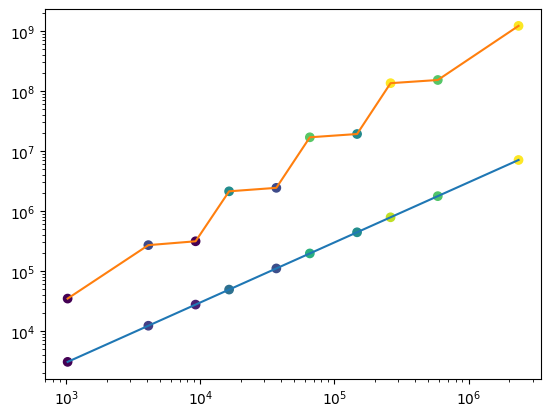

In [16]:
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.plot(mm_in_data_np[:,0], mm_in_data_np[:,1])
plt.scatter(mm_in_data_np[:,0], mm_in_data_np[:,1],norm="log",c=mm_in_data_np[:,2])
plt.plot(mm_out_data_np[:,0], mm_out_data_np[:,1])
plt.scatter(mm_out_data_np[:,0], mm_out_data_np[:,1],norm="log",c=mm_out_data_np[:,2])